In [39]:
import nasdaqdatalink
import os
import json
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#store my API key
with open('C:/Users/meich/.nasdaq/data_link_apikey.json') as f:
    data=json.load(f)
    key=data['api_key']
quandl.ApiConfig.api_key = key

In [53]:
#CREATE FXN TO CHANGE DATE INDICIES TO BE ALL EOM FROM BOM
def changeBOMtoEOM():
    
    #may could just be a short lambda fxn
    #needs to be run on every pull, same w/ dropping BOM if both sets of dates
    pass

In [17]:
#SP500 RATIOS: https://data.nasdaq.com/data/MULTPL-sp-500-ratios
# INDEX: EOM, MONTHLY
# RANGE: 
# DROP BOM MONTHS FROM THIS (HAS BOTH BOM AND EOM)
# other quarterly indicators are available, b/c estimated, such as price to book

SP500 = quandl.get([
'MULTPL/SP500_PE_RATIO_MONTH',
'MULTPL/SHILLER_PE_RATIO_MONTH',
'MULTPL/SP500_DIV_YIELD_MONTH',
'MULTPL/SP500_EARNINGS_YIELD_MONTH',
'MULTPL/SP500_EARNINGS_MONTH',
'MULTPL/SP500_DIV_MONTH',
'MULTPL/SP500_INFLADJ_MONTH'])

In [72]:
#CHECK FOR HIGHLY CORRELATED FIELDS, MAY DROP

#sns.heatmap(SP500.corr(),annot=True)

SP500

,MULTPL/SP500_PE_RATIO_MONTH - Value,MULTPL/SHILLER_PE_RATIO_MONTH - Value,MULTPL/SP500_DIV_YIELD_MONTH - Value,MULTPL/SP500_EARNINGS_YIELD_MONTH - Value,MULTPL/SP500_EARNINGS_MONTH - Value,MULTPL/SP500_DIV_MONTH - Value,MULTPL/SP500_INFLADJ_MONTH - Value
Date,,,,,,,
1871-01-01,11.10,NaN,NaN,9.01,NaN,NaN,104.16
1871-01-31,NaN,NaN,5.86,NaN,9.38,6.10,NaN
1871-02-01,11.25,10.92,NaN,8.89,NaN,NaN,102.44
1871-02-28,NaN,NaN,5.78,NaN,9.11,5.92,NaN
1871-03-01,11.52,11.19,NaN,8.68,NaN,NaN,103.41
...,...,...,...,...,...,...,...
2022-05-01,20.42,31.25,NaN,4.90,NaN,NaN,4040.36
2022-05-31,20.88,32.31,1.53,4.79,NaN,NaN,4132.15
2022-06-01,19.15,29.28,1.51,5.22,NaN,NaN,3789.99


In [67]:
#INFLATION RATES: https://data.nasdaq.com/data/RATEINF-inflation-rates
# INDEX: EOM, MONTHLY
# excel =CONCATENATE(CHAR(34),"RATEINF/",A15,CHAR(34),",")

RATEINF = pd.concat([
    quandl.get([
    "RATEINF/INFLATION_USA"
    ])
    ,
    quandl.get([
    "RATEINF/INFLATION_USA"
    ],
    transformation='rdiff')
],axis=1)

<AxesSubplot:xlabel='Date'>

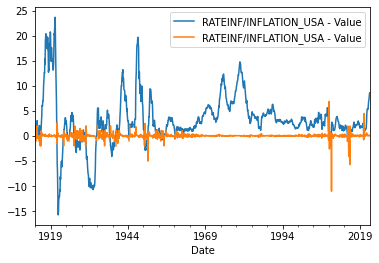

In [69]:
RATEINF.plot()

In [19]:
pd.concat([nasdaqdatalink.get("FRED/GDP"),nasdaqdatalink.get("FRED/GDP",transformation='rdiff')],axis=1)

,Value,Value
Date,,
1947-01-01,243.164,NaN
1947-04-01,245.968,0.011531
1947-07-01,249.585,0.014705
1947-10-01,259.745,0.040708
1948-01-01,265.742,0.023088
...,...,...
2020-10-01,21477.597,0.016038
2021-01-01,22038.226,0.026103
2021-04-01,22740.959,0.031887


In [75]:
# RETAIL TRADER ACTIVITY

RTA10 = quandl.get_table('NDAQ/RTAT10',paginate=True)

In [83]:
RTA10

,date,ticker,activity,sentiment
None,,,,
0,2022-07-08,TSLA,0.0663,1.0
1,2022-07-08,TQQQ,0.0261,5.0
2,2022-07-08,SQQQ,0.0288,3.0
3,2022-07-08,SPY,0.0456,3.0
4,2022-07-08,RBLX,0.0207,2.0
...,...,...,...,...
16395,2016-01-04,MSFT,0.0083,NaN
16396,2016-01-04,FB,0.0217,NaN
16397,2016-01-04,BABA,0.0103,NaN


In [ ]:
# BUILD SIMPLE BASELINE MODEL TO PREDICT SOME MONTHLY METRIC (EX: SHILLER PE RATIO)

In [ ]:
# BUILD MODEL TO PREDICT STOCK PRICES
#    START THIS ONE WITH JUST SHORT INTEREST AND RETAIL TRADING ACTIVITY AND BUILD FROM THERE
